In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 13)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
180,55,1,0,132,353,0,1,132,1,1.2,1,1,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,0


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [12]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64


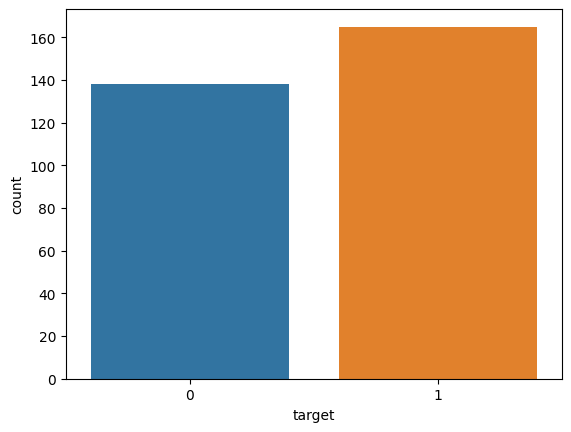

In [13]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:
data["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

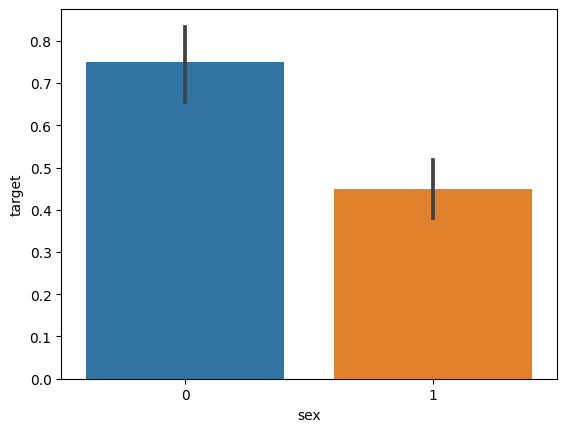

In [16]:
sns.barplot(data["sex"],data["target"])

### Here 0 is female and 1 is male patients

In [17]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [18]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [19]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [20]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


In [21]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [22]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

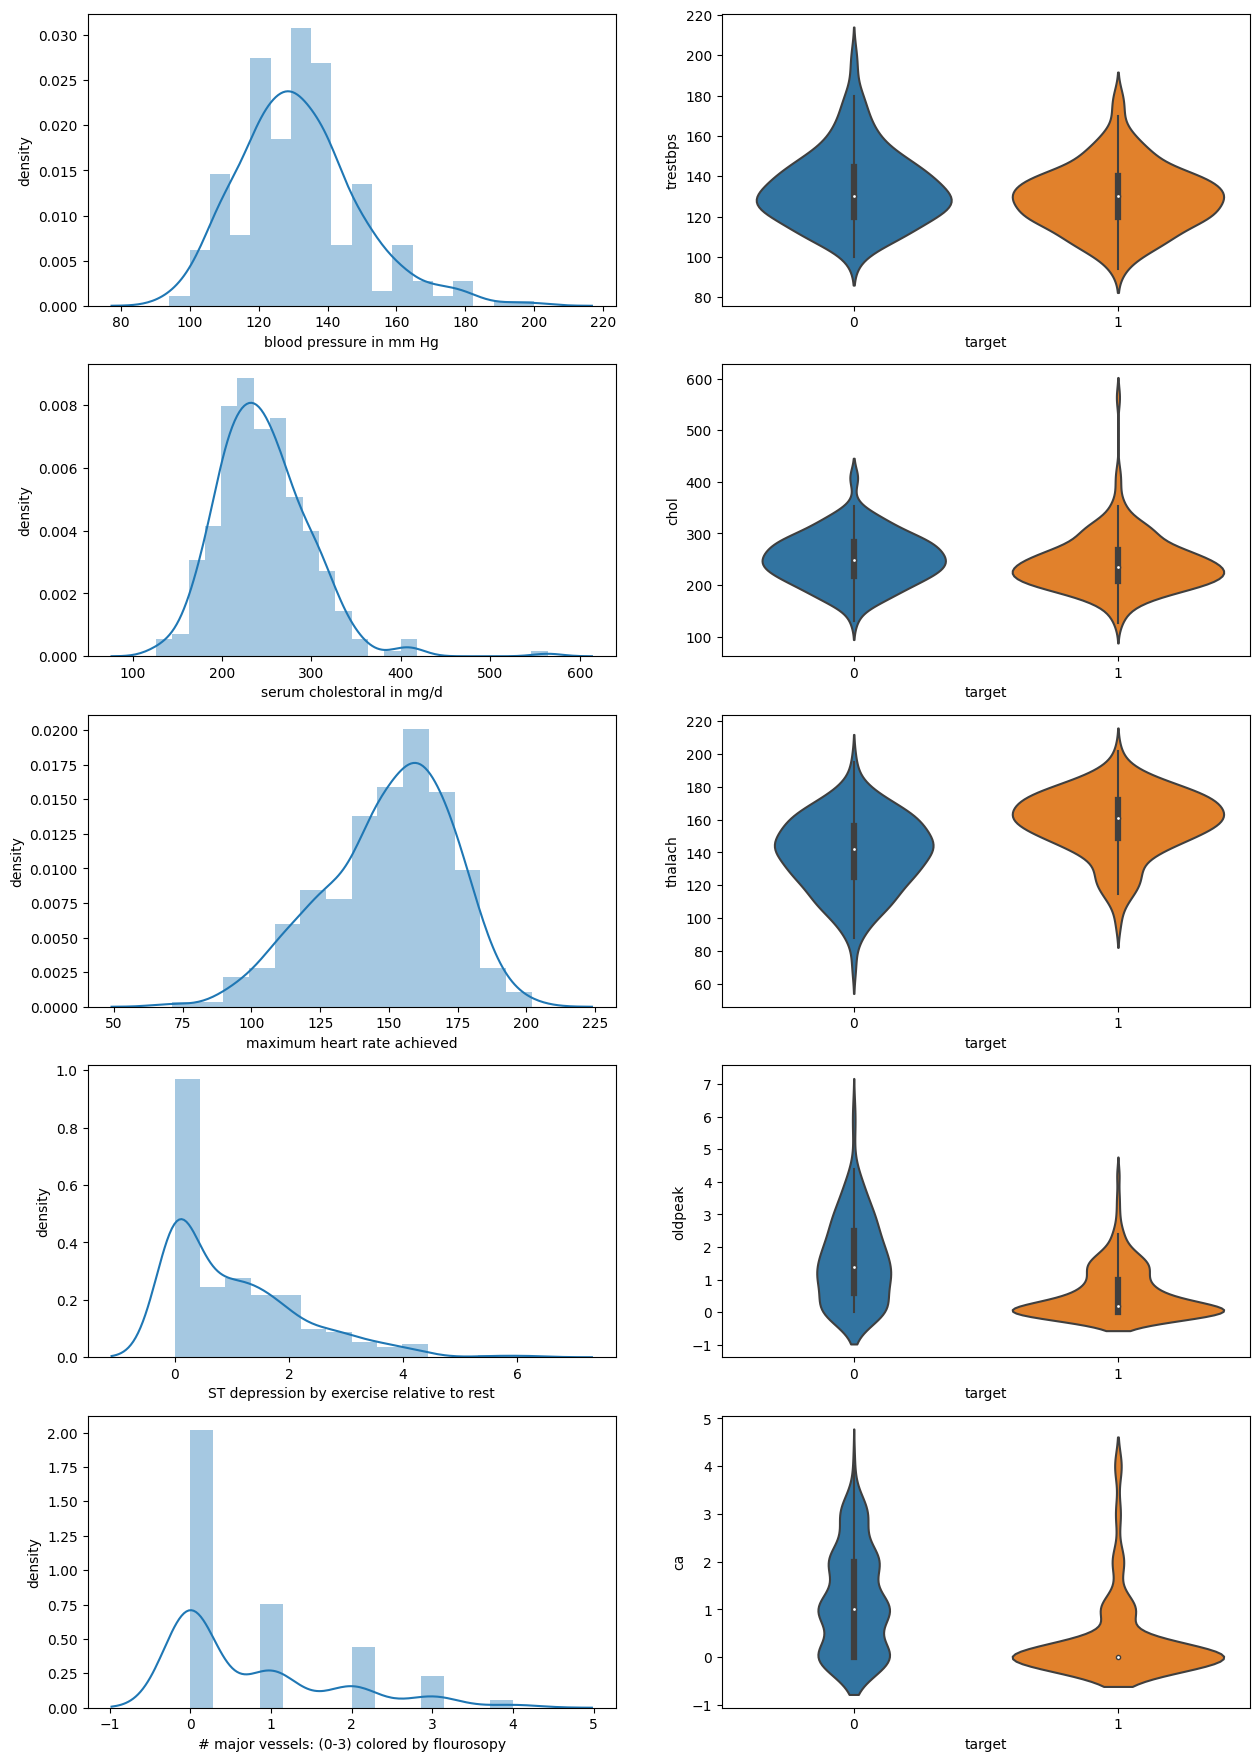

In [23]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

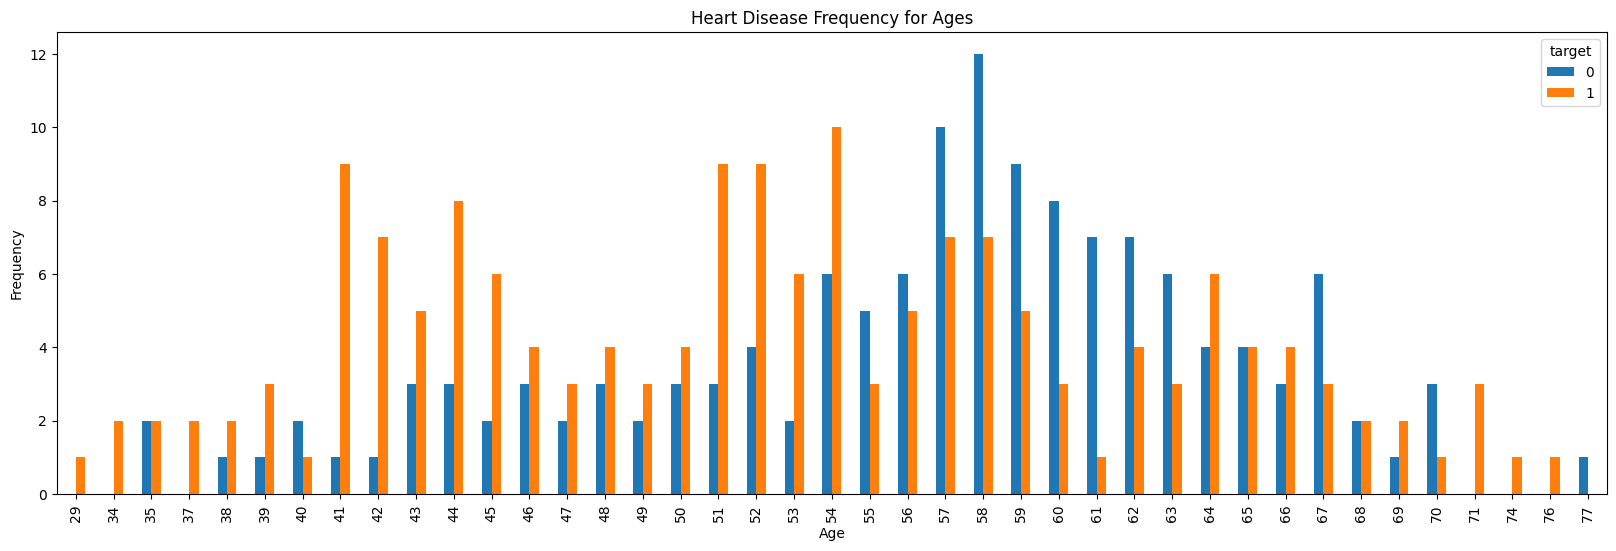

In [24]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

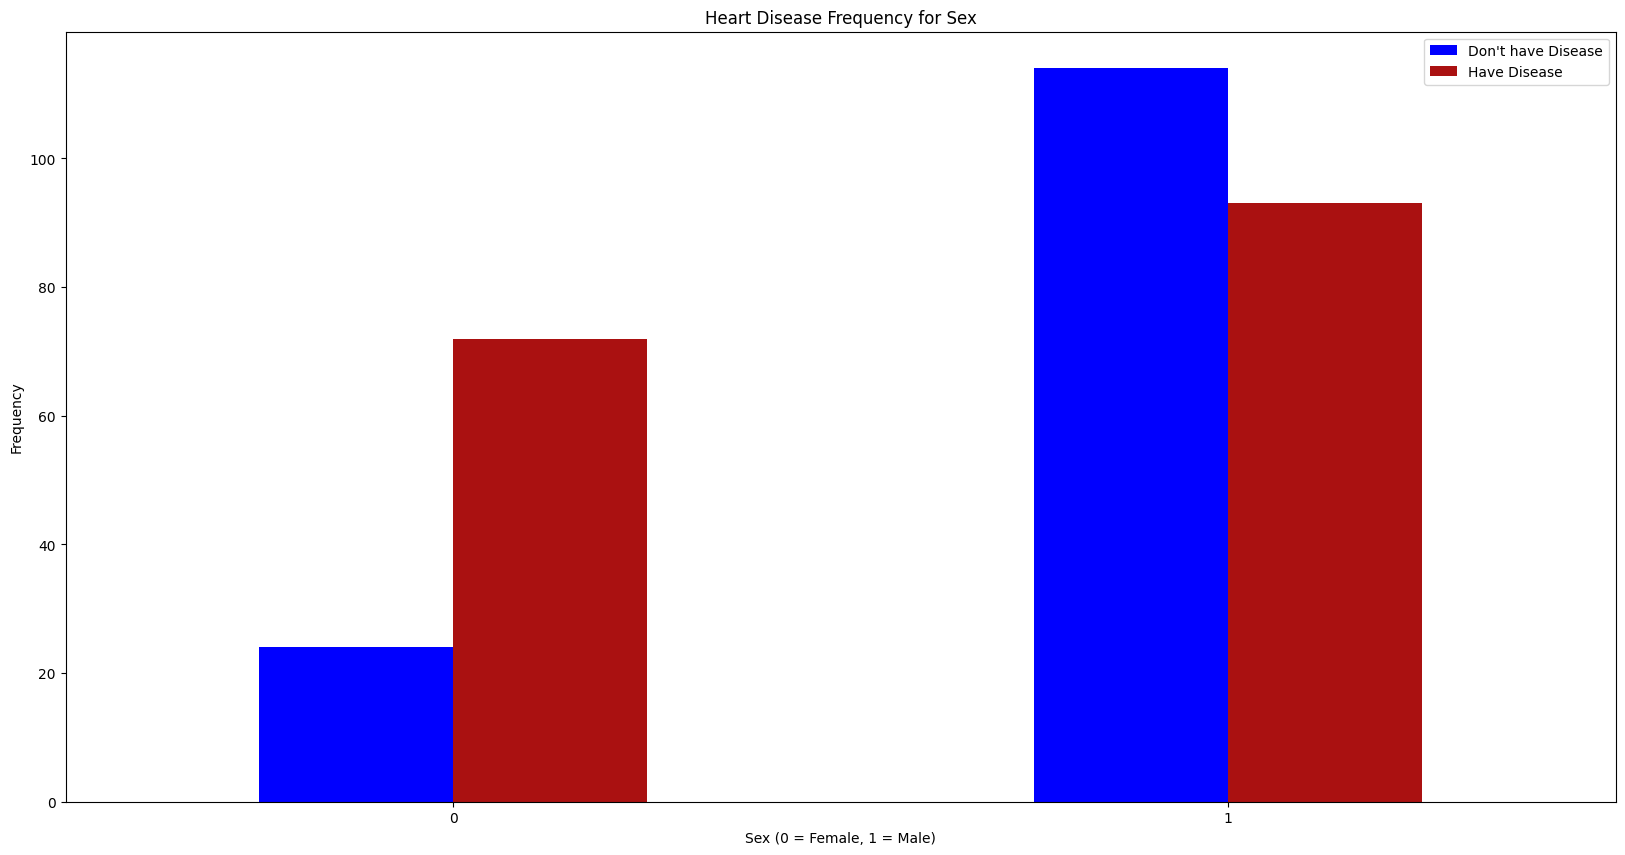

In [25]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'target']

In [27]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


# Heart disease according to Fasting Blood sugar 

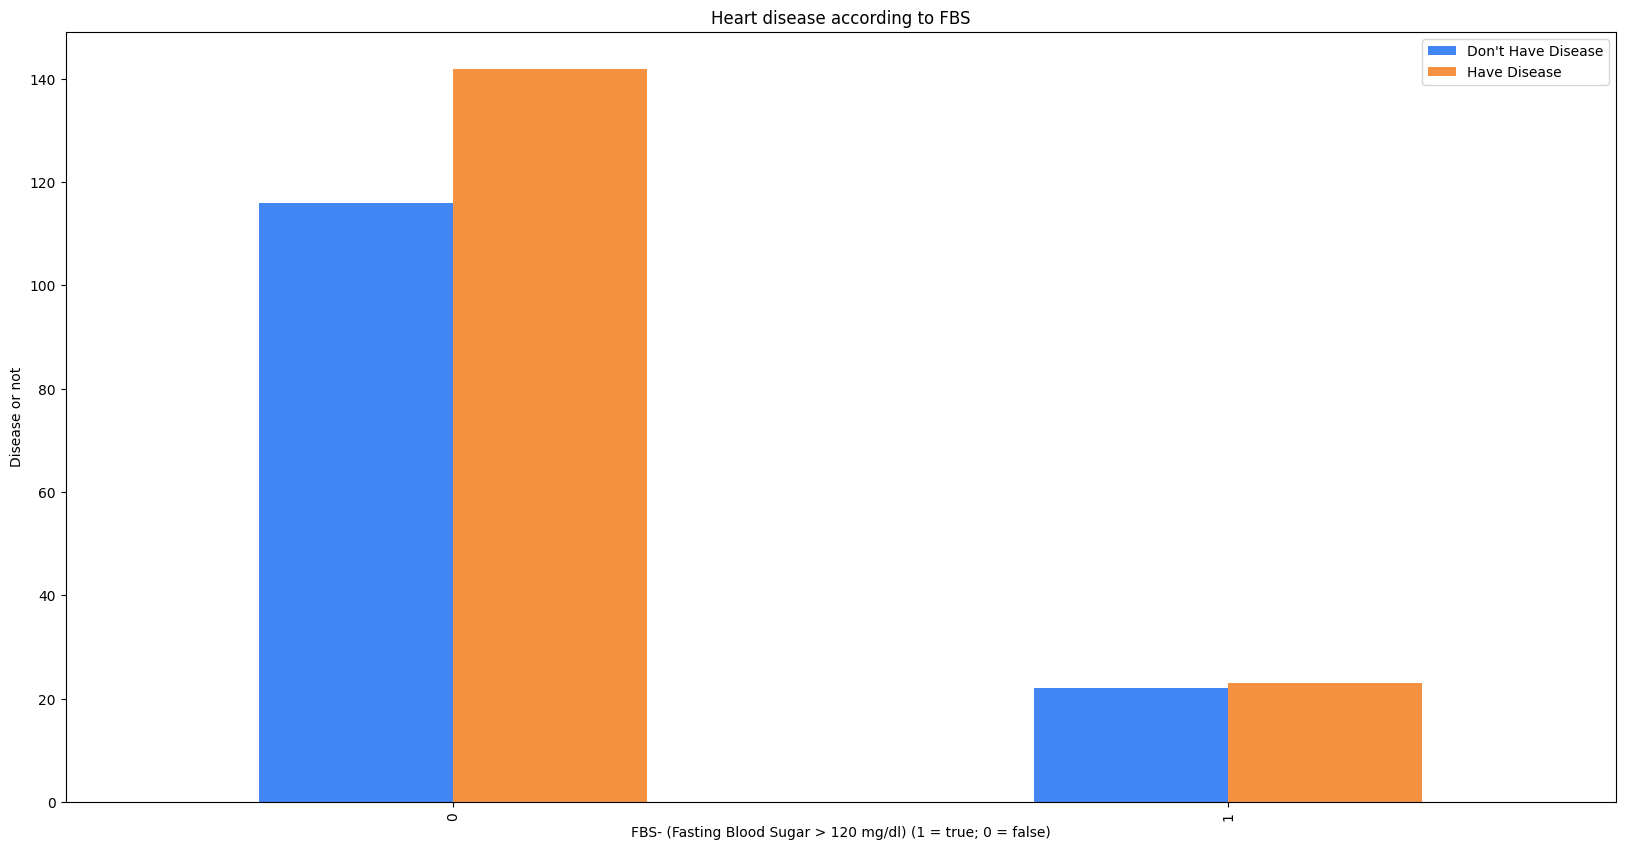

In [28]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [29]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='chest_pain_type', ylabel='target'>

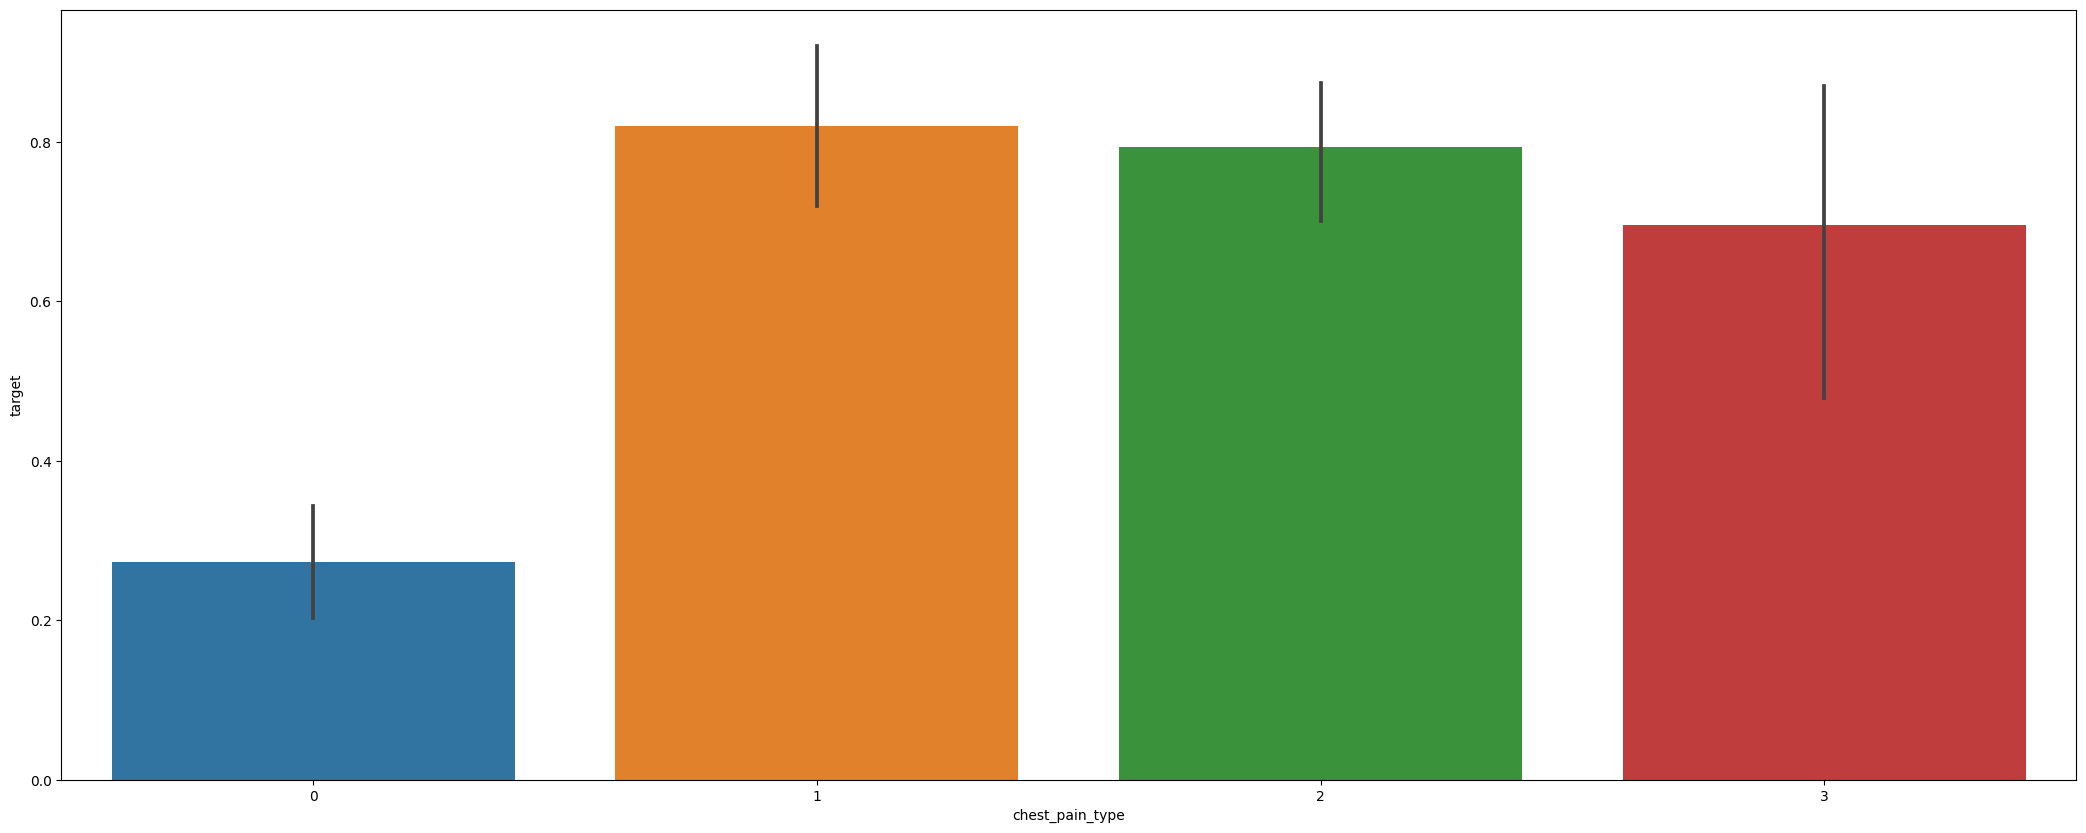

In [30]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [31]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

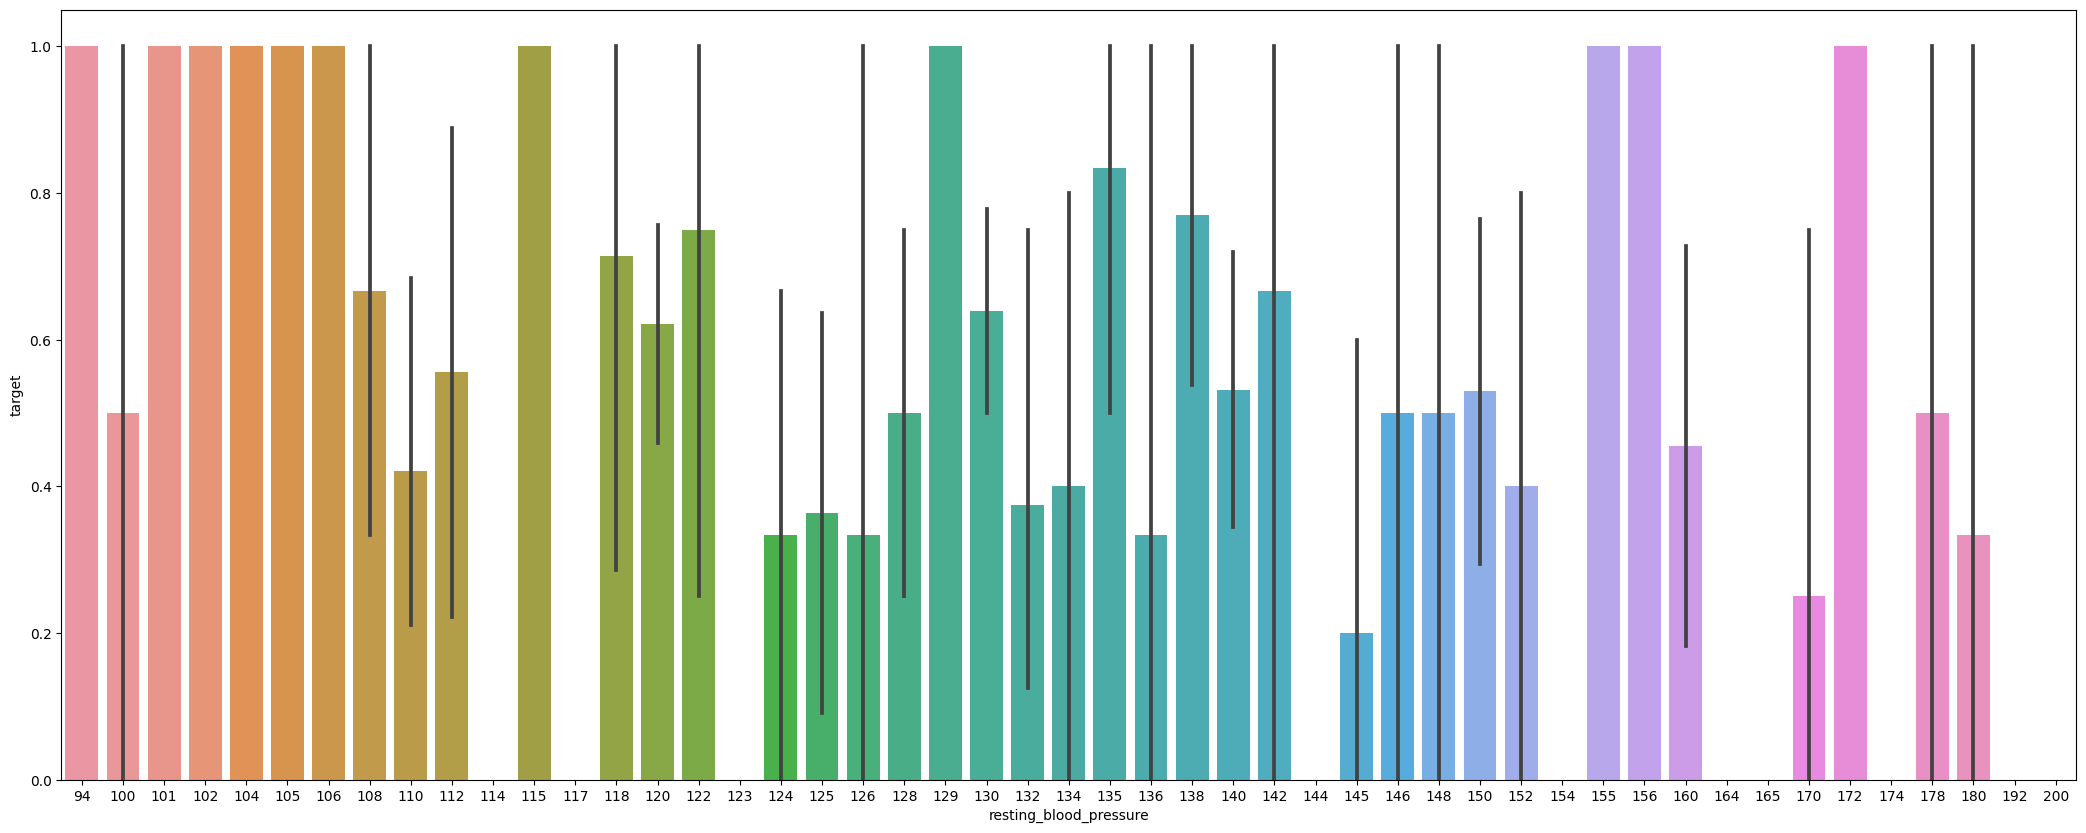

In [32]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [33]:
data["rest_ecg"].unique()

array([0, 1, 2])

<Axes: xlabel='rest_ecg', ylabel='target'>

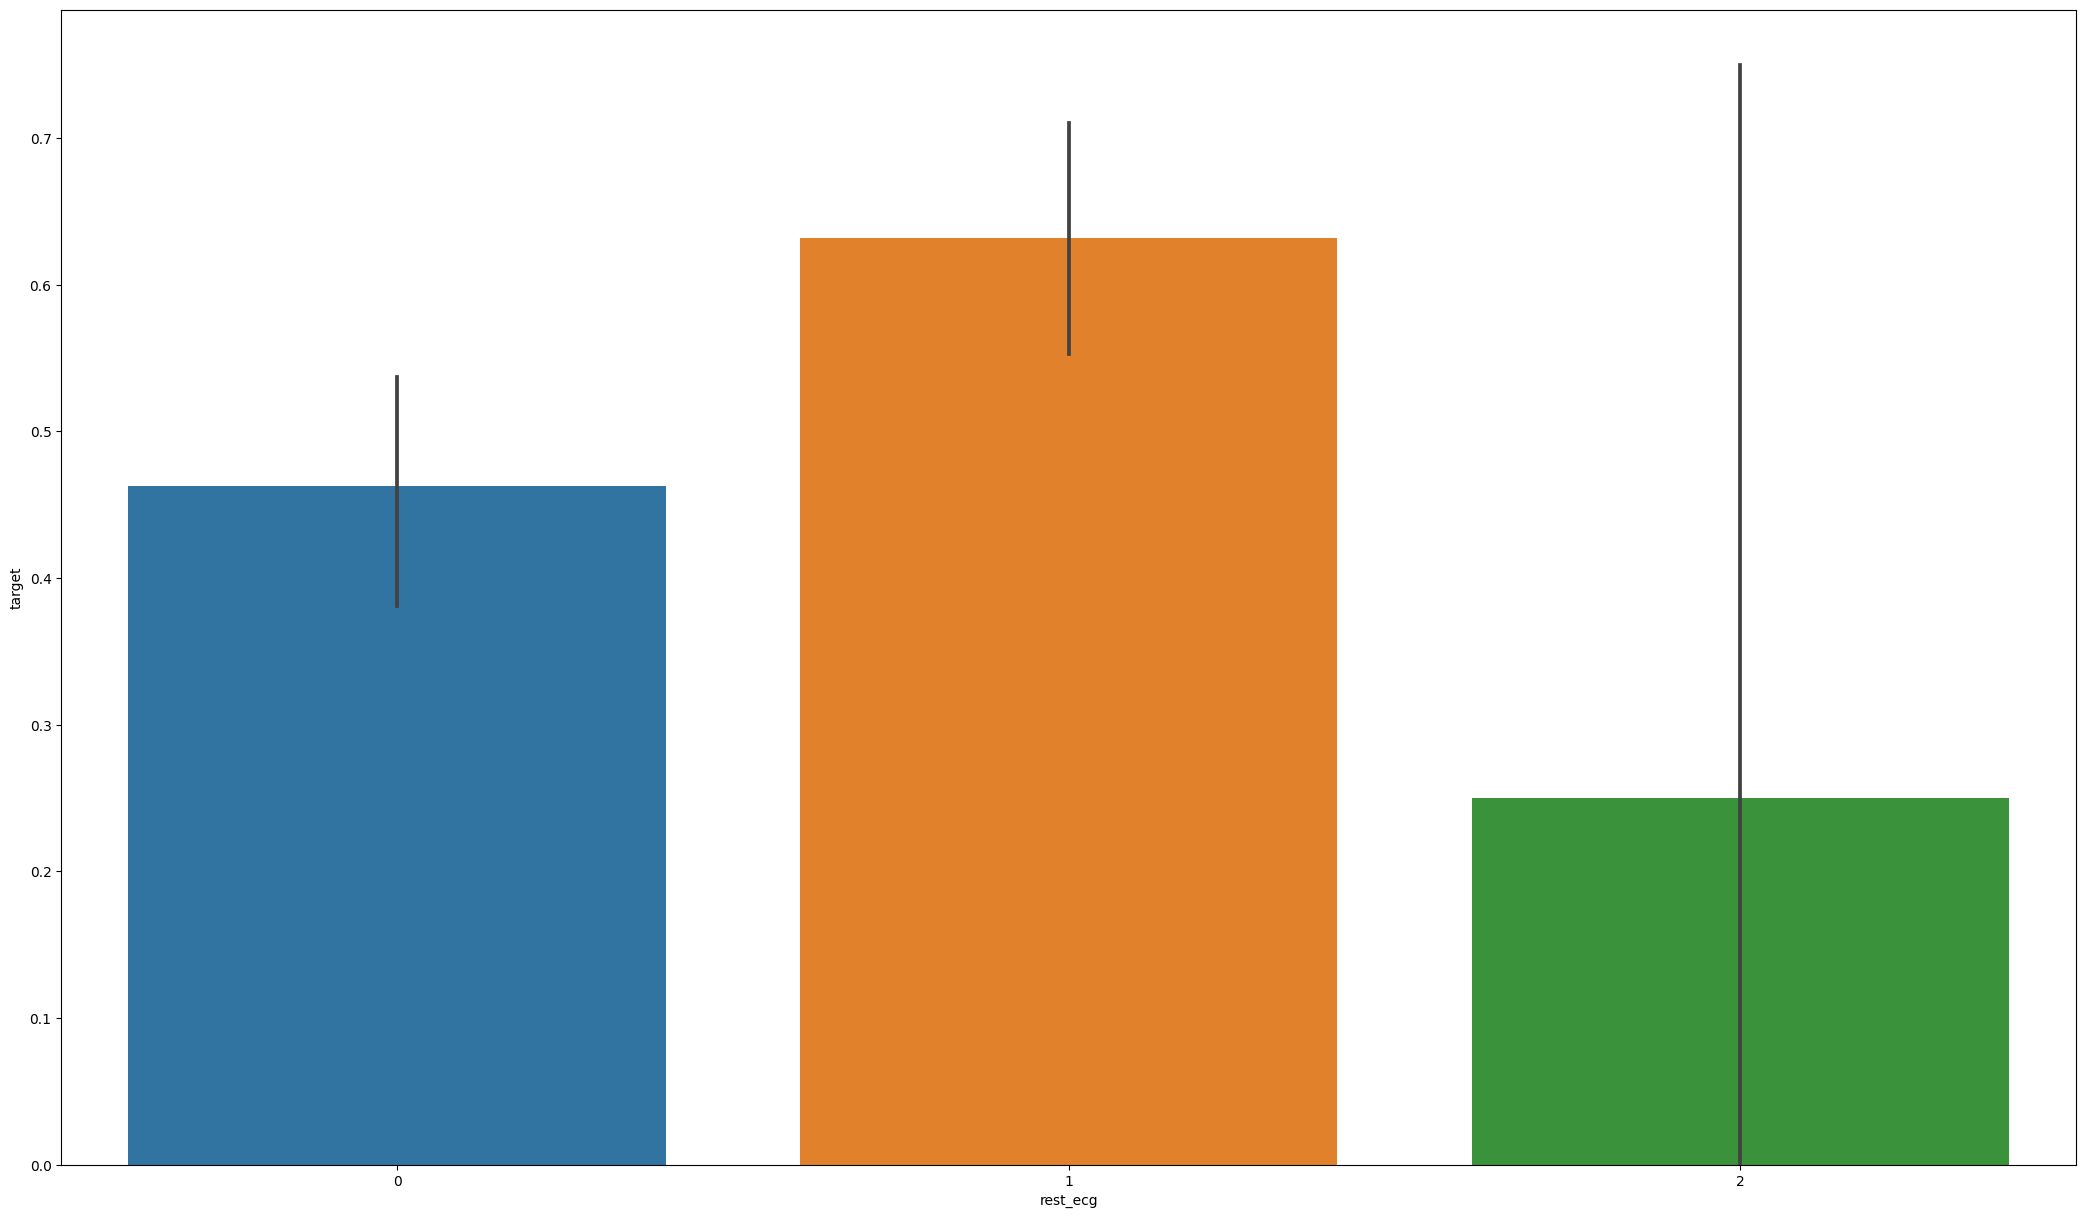

In [34]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [35]:
data["exercise_induced_angina"].unique()

array([0, 1])

<Axes: xlabel='exercise_induced_angina', ylabel='target'>

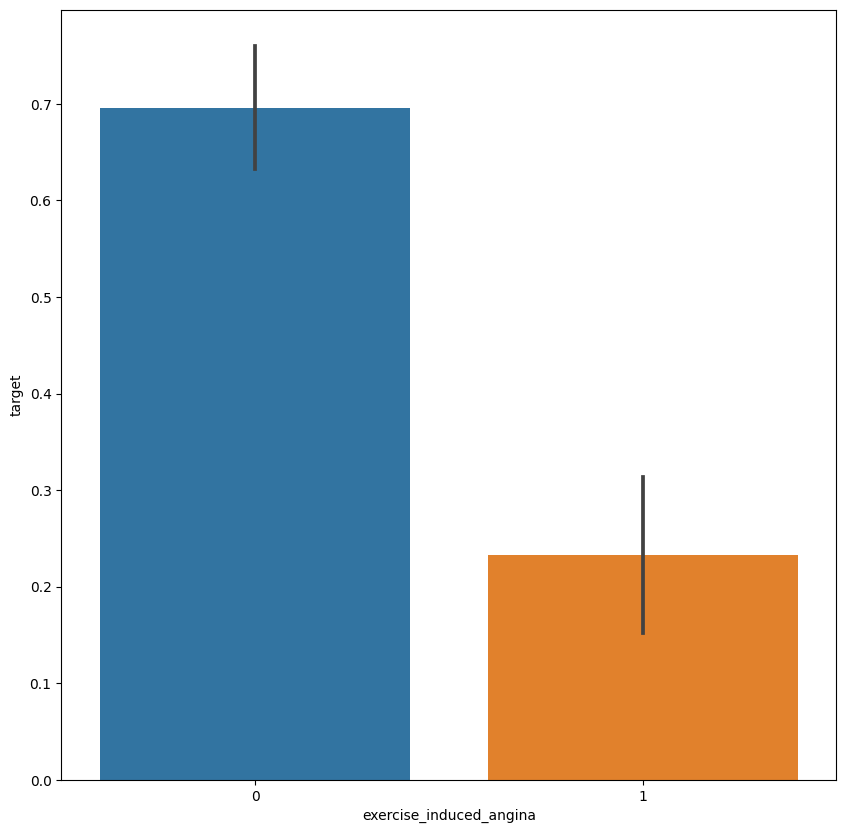

In [36]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [37]:
data["st_slope"].unique()

array([0, 2, 1])

<Axes: xlabel='st_slope', ylabel='target'>

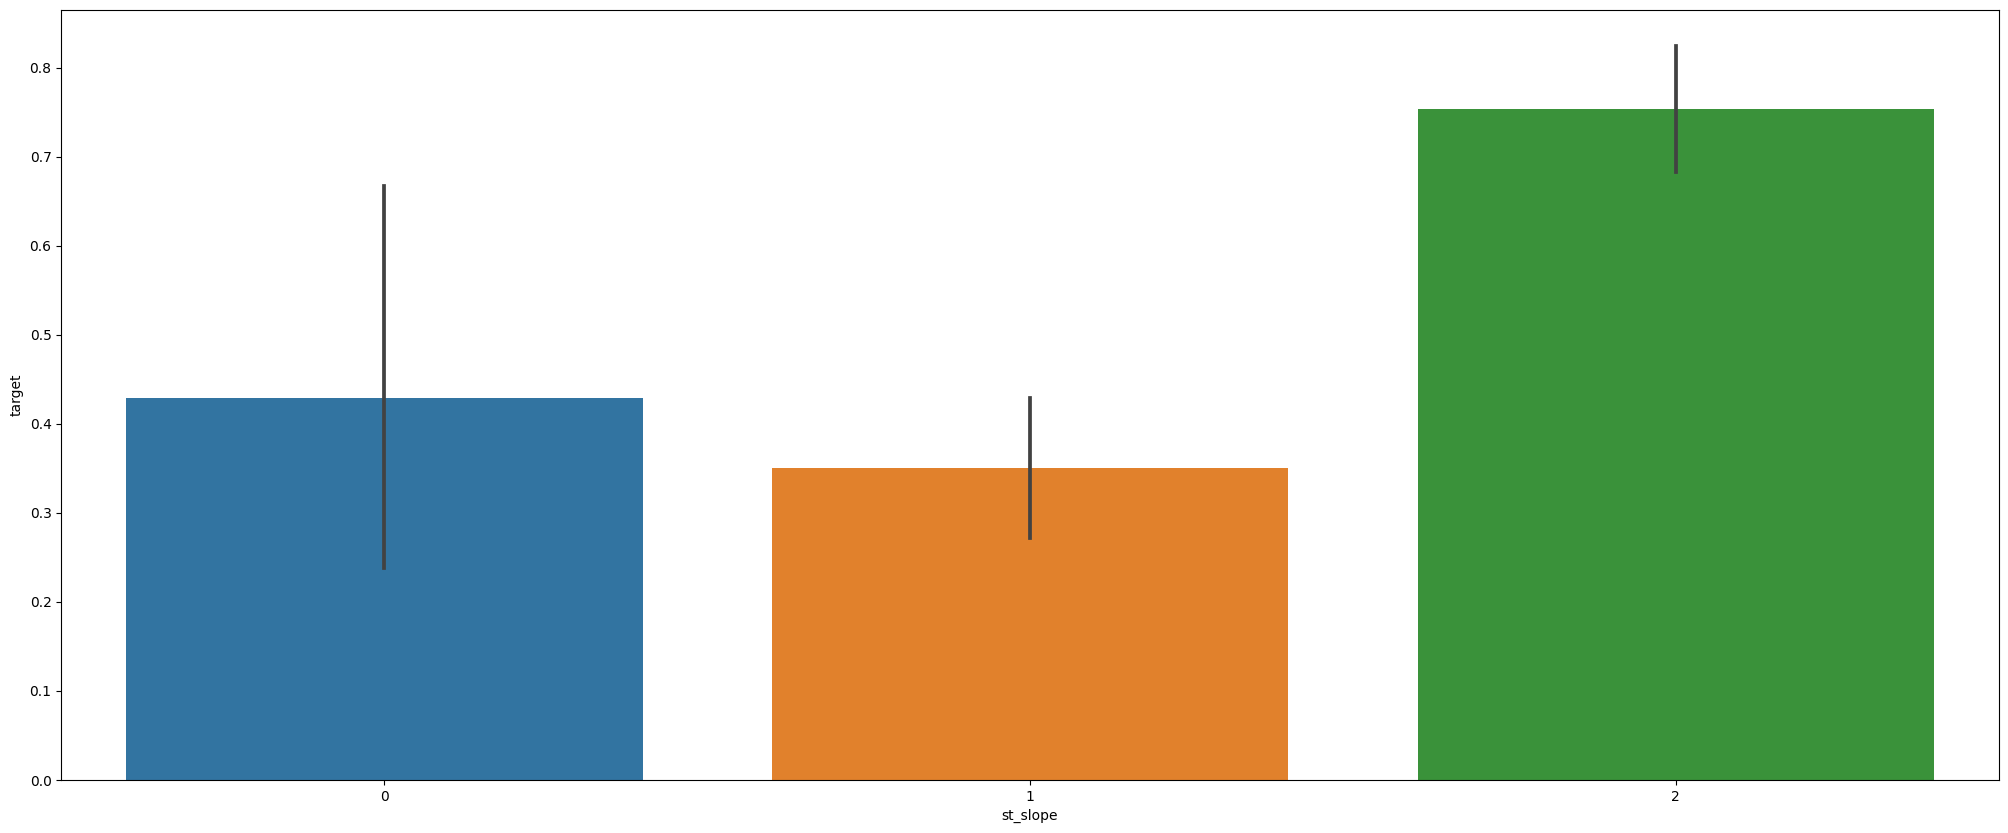

In [38]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [39]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4])

### count num_major vessels

<Axes: xlabel='num_major_vessels', ylabel='count'>

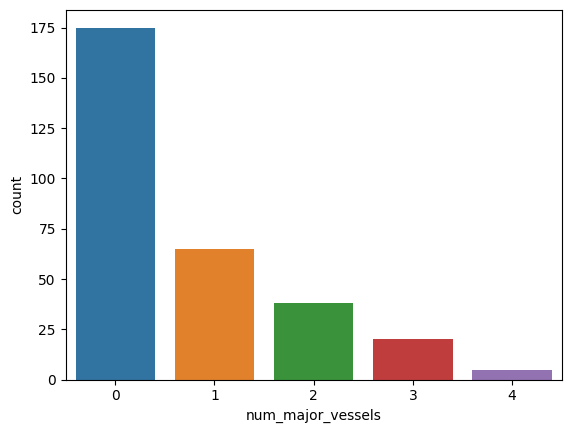

In [40]:
sns.countplot(data["num_major_vessels"])

### comparing with target

<Axes: xlabel='num_major_vessels', ylabel='target'>

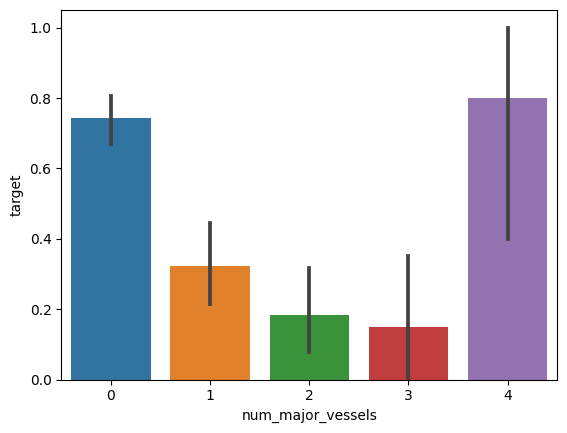

In [41]:
sns.barplot(data["num_major_vessels"],y)

### num_major_vessels=4 has astonishingly large number of heart patients

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [42]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

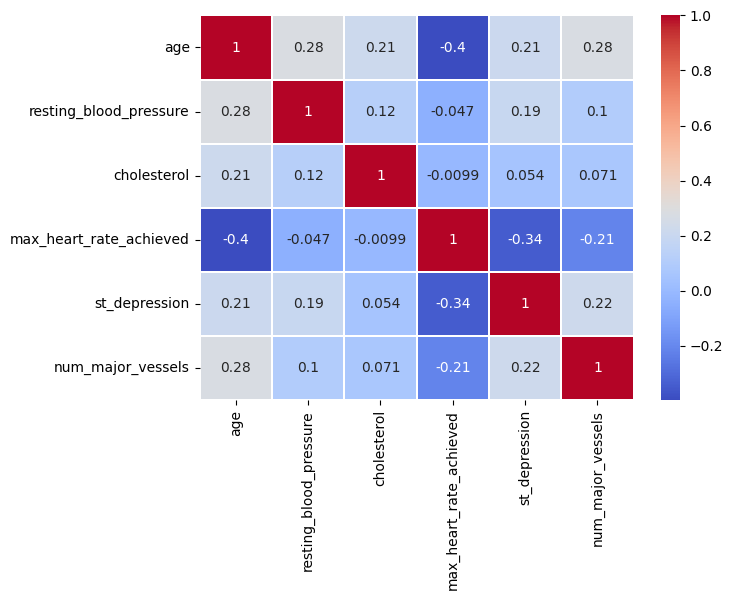

In [43]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [44]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [45]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0, stratify=data["target"])
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [46]:
X_train.shape

(242, 12)

In [47]:
X_test.shape

(61, 12)

In [48]:
Y_train.shape

(242,)

In [49]:
Y_test.shape

(61,)

## importing Accuracy score

In [50]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [51]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0]


In [53]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

[[24  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy: 0.8852459016393442


In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 85.12%
Test accuracy: 88.52%


Best ACCURACY possible using Logistic regression

In [56]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9016393442622951

# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

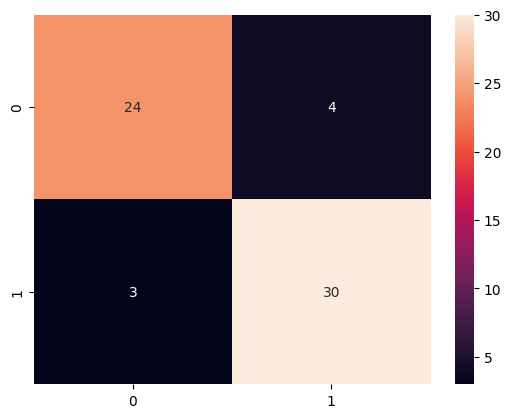

In [59]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [60]:
from sklearn.metrics import precision_score

In [61]:
precision = precision_score(Y_test, y_pred_lr)

In [62]:
print("Precision: ",precision)

Precision:  0.8823529411764706


# Recall

In [63]:
from sklearn.metrics import recall_score

In [64]:
recall = recall_score(Y_test, y_pred_lr)

In [65]:
print("Recall is: ",recall)

Recall is:  0.9090909090909091




---



# F-Score

balance of precision and recall score

In [66]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [68]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 81.97 %


In [69]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.820


Now, let us prune the depth of trees and check the accuracy.

In [70]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.893
Accuracy on test set: 0.787


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

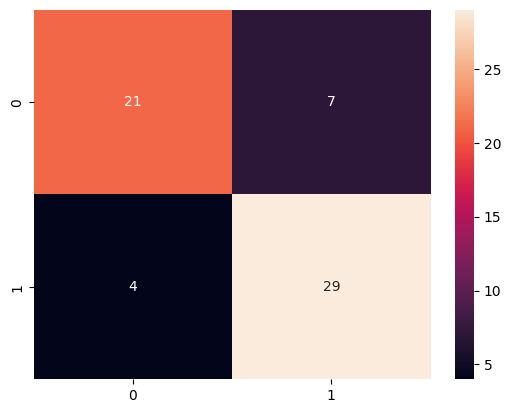

In [73]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [74]:
from sklearn.metrics import precision_score

In [75]:
precision = precision_score(Y_test, y_pred_rf)

In [76]:
print("Precision: ",precision)

Precision:  0.8055555555555556


# recall

In [77]:
from sklearn.metrics import recall_score

In [78]:
recall = recall_score(Y_test, y_pred_rf)

In [79]:
print("Recall is: ",recall)

Recall is:  0.8787878787878788


# F score

In [80]:
print((2*precision*recall)/(precision+recall))

0.8405797101449276


# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 80.99%
Test accuracy: 78.69%
[1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [82]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.69 %


In [83]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 80.99%
Test accuracy: 78.69%


## confusion matrix of Naive Bayes

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

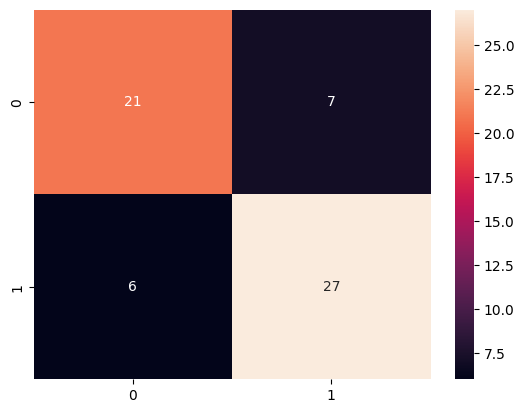

In [86]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [87]:
from sklearn.metrics import precision_score

In [88]:
precision = precision_score(Y_test, y_pred_nb)

In [89]:
print("Precision: ",precision)

Precision:  0.7941176470588235


# recall

In [90]:
from sklearn.metrics import recall_score

In [91]:
recall = recall_score(Y_test, y_pred_nb)

In [92]:
print("Recall is: ",recall)

Recall is:  0.8181818181818182


# f score

In [93]:
print((2*precision*recall)/(precision+recall))

0.8059701492537314


# KNN(K Nearest Neighbors)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 73.55%
Test accuracy: 73.77%
[1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0]


In [95]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.77 %


In [96]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 74.38%
Test accuracy: 70.49%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [97]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 65.57%
n_neigbors = 2
Train accuracy: 77.27%
Test accuracy: 63.93%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 70.49%
n_neigbors = 4
Train accuracy: 73.97%
Test accuracy: 75.41%
n_neigbors = 5
Train accuracy: 74.38%
Test accuracy: 70.49%
n_neigbors = 6
Train accuracy: 73.97%
Test accuracy: 68.85%
n_neigbors = 7
Train accuracy: 73.55%
Test accuracy: 72.13%
n_neigbors = 8
Train accuracy: 73.55%
Test accuracy: 73.77%
n_neigbors = 9
Train accuracy: 71.90%
Test accuracy: 72.13%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

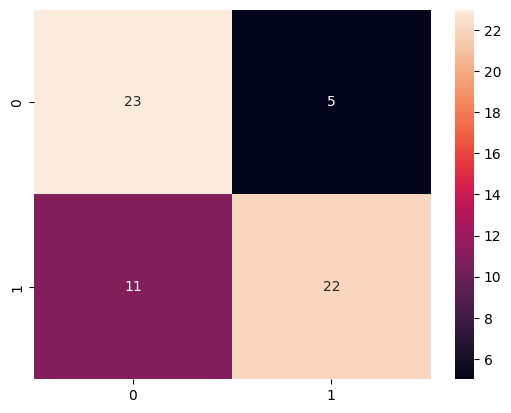

In [100]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [101]:
from sklearn.metrics import precision_score

In [102]:
precision = precision_score(Y_test, y_pred_knn)

In [103]:
print("Precision: ",precision)

Precision:  0.8148148148148148


# recall

In [104]:
from sklearn.metrics import recall_score

In [105]:
recall = recall_score(Y_test, y_pred_knn)

In [106]:
print("Recall is: ",recall)

Recall is:  0.6666666666666666


# f score

In [107]:
print((2*precision*recall)/(precision+recall))

0.7333333333333333


# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [109]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 80.33 %


In [110]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.705


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [111]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.803


## Confusion Matrix

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

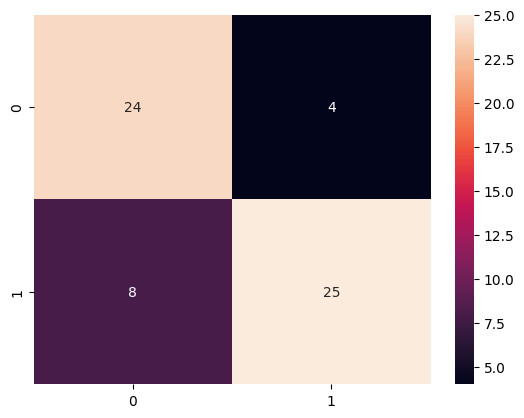

In [114]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [115]:
from sklearn.metrics import precision_score

In [116]:
precision = precision_score(Y_test, y_pred_dt)

In [117]:
print("Precision: ",precision)

Precision:  0.8620689655172413


# recall

In [118]:
from sklearn.metrics import recall_score

In [119]:
recall = recall_score(Y_test, y_pred_dt)

In [120]:
print("Recall is: ",recall)

Recall is:  0.7575757575757576


# f score

In [121]:
print((2*precision*recall)/(precision+recall))

0.8064516129032258


# Final Score

In [122]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [123]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.737705
Decision Trees,0.803279
Logistic Regression,0.885246
Naive Bayes,0.786885
Random Forests,0.819672


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

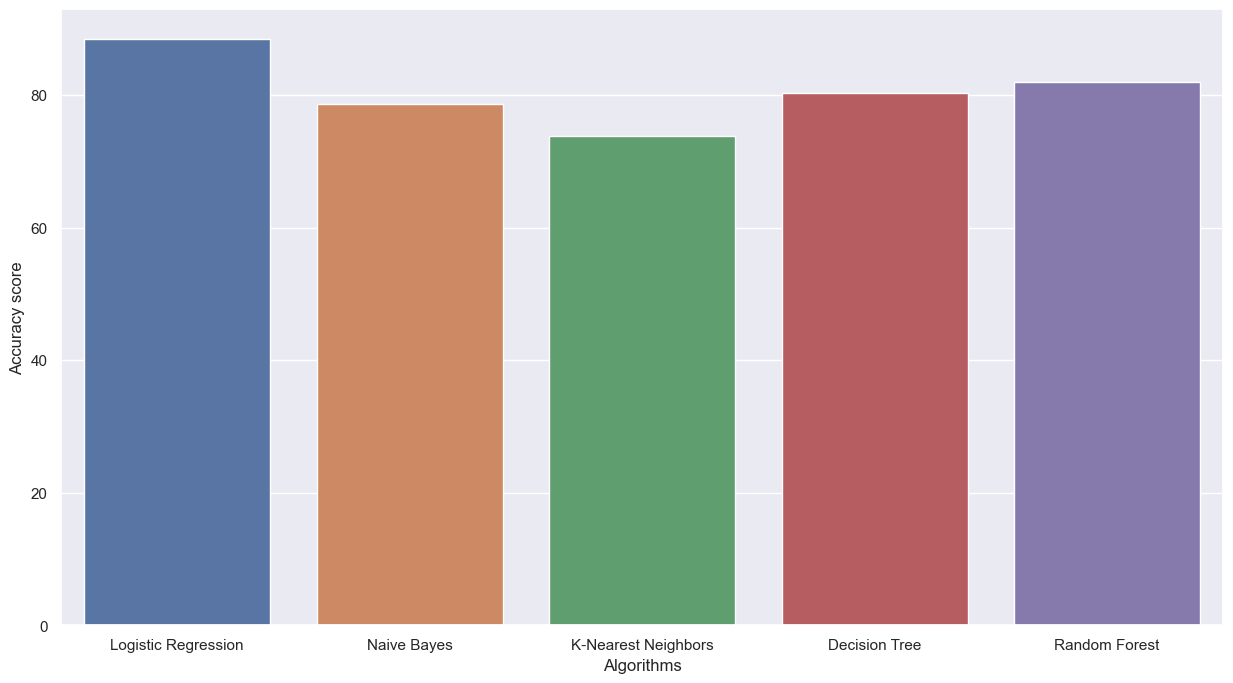

In [124]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [125]:
import pickle
filename = 'heart_trained_model.pkl'
pickle.dump(logreg,open(filename,'wb'))


In [126]:
loaded_model = pickle.load(open('heart_trained_model.pkl','rb'))

In [127]:
y = data.loc[data['target'] == 1]
y.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [128]:
# case 1

In [129]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)
if(pred[0] == 0):
    print("This User no need to worry")
else:
    print("The User need to consult doctor and take precautions")

[1]
The User need to consult doctor and take precautions


In [130]:
# Case 2

In [131]:
y = data.loc[data['target'] == 0]
y.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,0


In [132]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)
if(pred[0] == 0):
    print("The User no need to worry")
else:
    print("The User need to consult doctor and take precautions")


[0]
The User no need to worry
